In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

brutos = pd.read_csv('dados.csv')


In [20]:
brutos

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,228,18.7,23.1
1,2008,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Hispanic,68,5.8,6.6
2,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,White Non-Hispanic,271,20.1,17.9
3,2010,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,140,12.3,21.4
4,2009,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,255,30,30
...,...,...,...,...,...,...,...
1089,2012,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,6,.,.
1090,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,White Non-Hispanic,169,11.9,7.4
1091,2009,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3236,240.5,205.6
1092,2009,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,White Non-Hispanic,191,14.2,13


In [21]:
brutos['Leading Cause'] = brutos['Leading Cause'].astype('category')
brutos['Leading Cause'].cat.categories=['AEDP', 'AD', 'AOC', 'AAD', 'As', 'At', 'CD', 'CCPP', 'CLDC', 'CLRD', 'CMDCA', 'DM', 'DH', 'EHRD', 'HIVD', 'IP', 'IBUN', 'ISH', 'MN', 'MBDAPOPSU', 'MBDUA', 'NNSN', 'PD', 'S', 'T', 'VH']


def calcula_media(coluna):
    lista=[]
    for linha in coluna:
        if linha!='.':
            lista.append(float(linha))
    return sum(lista)
media=calcula_media(brutos['Deaths'])/len(brutos.Deaths)

def binario(coluna_mortes):
    y=[]
    for n in coluna_mortes:
        if n!='.':
            n=int(n)
            if n>=media:
                y.append(1)
            else:
                y.append(0)
        else:
            y.append(0)
    return y
brutos['y']=binario(brutos.Deaths)


In [22]:
brutos=brutos.loc[:,['Leading Cause','Sex','Race Ethnicity','y']]
brutos

,Leading Cause,Sex,Race Ethnicity,y
0,IP,F,Hispanic,0
1,AEDP,F,Hispanic,0
2,AEDP,M,White Non-Hispanic,0
3,CD,M,Hispanic,0
4,As,M,Black Non-Hispanic,0
...,...,...,...,...
1089,IP,F,Not Stated/Unknown,0
1090,AEDP,F,White Non-Hispanic,0
1091,MN,M,White Non-Hispanic,1
1092,ISH,M,White Non-Hispanic,0


### Análise Exploratória

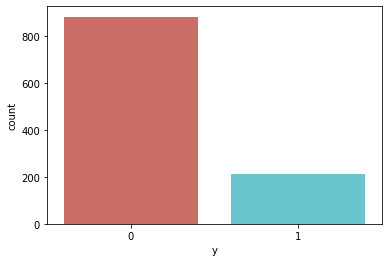

In [23]:
sns.countplot(x=brutos['y'],data=brutos,palette='hls')
plt.show()

In [24]:
brutos['y'].value_counts(normalize=True)

0    0.805302
1    0.194698
Name: y, dtype: float64

80,53% dos dados reconhecem que não há um estado alarmante de mortes.<br>
19,47% dos dados reconhecem que há um estado alarmante de mortes.

In [25]:
print ('Causa:Média do y')
for i,e in brutos.groupby('Leading Cause').mean().items():
    for d,n in e.items():
        if n>0:
            print ('{}:{:.3f}'.format(d,n))

Causa:Média do y
AD:0.521
CD:0.056
CLRD:0.125
DM:0.043
DH:0.667
IP:0.167
MN:0.656


A partir dos valores acima, é possível pereceber que dentre as 26 causas de mortes, apenas 7 possuem valores 1 em 'y'. Ou seja, 7 causas são consideradas problemáticas para o valor de 388 mortes. Dentre essas 7, 3 possuem média maior de 0,5 das linhas como valor 1, sendo elas:
<br>
<br>
-Alzheimer (0,521);<br>
-Problema no coração (0,667);<br>
-Tumor maligno (0,656).<br>
<br>
Inicialmente é plausível, portanto, considerar essas 3 como as mais problemáticas causas de morte em Nova Iorque, no entanto não estamos considerando o sexo nem a etnia das pessoas.

In [26]:
print ('Etnia:Média do y')
for i,e in brutos.groupby('Race Ethnicity').mean().items():
    for d,n in e.items():
        if n>0:
            print ('{}:{:.3f}'.format(d,n))

Etnia:Média do y
Asian and Pacific Islander:0.186
Black Non-Hispanic:0.292
Hispanic:0.271
White Non-Hispanic:0.455


Nesse caso, os valores são masi dispersos, já que das 6 etnias, 4 possuem algum valor 1 na coluna 'y', snedo a maior média dos brancos não-hispânicos. As duas etnias que não possuem algum valor 1 são 'desconhecida' e 'outra etnia'.

### Regressão Logística

In [27]:
dummies=['Leading Cause','Sex','Race Ethnicity']
for c in dummies:
    coluna=pd.get_dummies(brutos[c],prefix=c)
    brutos=brutos.join(coluna)

In [31]:
brutos.drop(columns=['Leading Cause','Sex','Race Ethnicity'])
colunas=[]
for i in brutos.columns:
    if i not in dummies:
        colunas.append(i)
novo=brutos[colunas]

In [34]:
novo

,y,Leading Cause_AEDP,Leading Cause_AD,Leading Cause_AOC,Leading Cause_AAD,Leading Cause_As,Leading Cause_At,Leading Cause_CD,Leading Cause_CCPP,Leading Cause_CLDC,...,Leading Cause_T,Leading Cause_VH,Sex_F,Sex_M,Race Ethnicity_Asian and Pacific Islander,Race Ethnicity_Black Non-Hispanic,Race Ethnicity_Hispanic,Race Ethnicity_Not Stated/Unknown,Race Ethnicity_Other Race/ Ethnicity,Race Ethnicity_White Non-Hispanic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1090,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1091,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [63]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)


x = novo.loc[:, novo.columns != 'y']
y = novo.loc[:, novo.columns == 'y']
 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
colunas_x = x_train.columns

os_data_x,os_data_y=os.fit_sample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=colunas_x )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("Proporção dos dados que não possuem situação alarmante de mortos: ",len(os_data_y[os_data_y['y']==0])/len(os_data_x))
print("Proporção dos dados que possuem situação alarmante de mortos: ",len(os_data_y[os_data_y['y']==1])/len(os_data_x))

Proporção dos dados que não possuem situação alarmante de mortos:  0.5
Proporção dos dados que possuem situação alarmante de mortos:  0.5


In [80]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,os_data_x)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.160156
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 51
                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.769      
Dependent Variable:          y                         AIC:                       461.3434   
Date:                        2020-11-17 17:06          BIC:                       635.1902   
No. Observations:            1228                      Log-Likelihood:            -196.67    
Df Model:                    33                        LL-Null:                   -851.18    
Df Residuals:                1194                      LLR p-value:               4.9040e-254
Converged:                   0.0000                    Scale:                     1.0000     
---------------------------------------------------------------------------------------------
                                           Coef.   Std.Err. 

C:\Users\thpro\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Acurácia do modelo de regressão logística nos dados de teste: {:.2f}'.format(logreg.score(x_test, y_test)))

Acurácia do modelo de regressão logística nos dados de teste: 0.98


C:\Users\thpro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[267   0]
 [  8  54]]


In [77]:
print ('Predições corretas: {}'.format(confusion_matrix[0][0]+confusion_matrix[1][1]))
print ('Predições incorretas: {}'.format(confusion_matrix[0][1]+confusion_matrix[1][0]))

Predições corretas: 321
Predições incorretas: 8
